Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk

In [40]:
num = [125]
den = [1, 27, 278, 1470]

1. a.

In [41]:
g_tf = ct.TransferFunction(num, den)
zg = ct.zeros(g_tf)
pg = ct.poles(g_tf)
gg = ct.dcgain(g_tf)
print ("g zeros = ", zg)
print ("g poles = ", pg)
print ("g gain = ", gg)

g zeros =  []
g poles =  [-15.+0.j          -6.+7.87400787j  -6.-7.87400787j]
g gain =  0.08503401360544217


1. b.

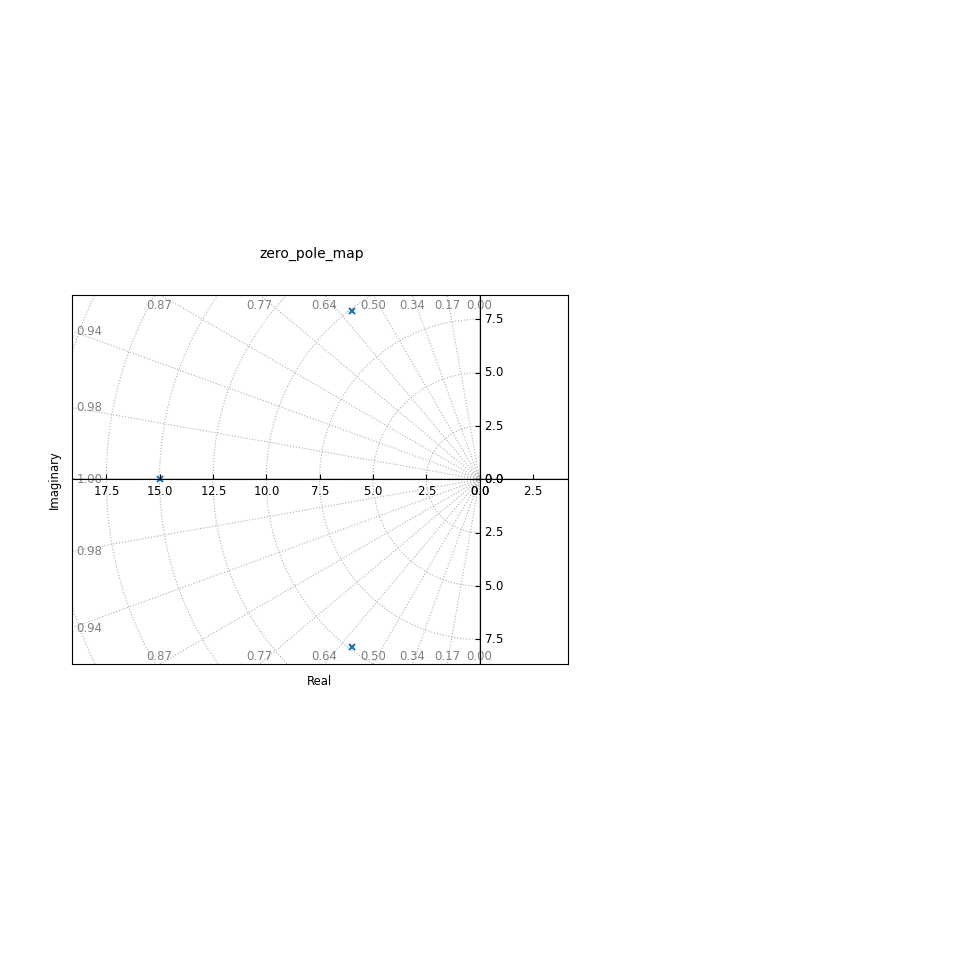

In [42]:
ct.pole_zero_plot(g_tf, title= 'zero_pole_map', grid=True, marker_size = 5)

1. c.

In [43]:
s = sp.symbols('s')
g_polly =(125)/((s+15)*(s**2+12*s+98)) 
print ("g polly = ", g_polly)

g = sp.apart(g_polly)
print ("g partial = ", g)

g polly =  125/((s + 15)*(s**2 + 12*s + 98))
g partial =  -125*(s - 3)/(143*(s**2 + 12*s + 98)) + 125/(143*(s + 15))


1. d.

In [44]:
g_ss = ct.tf2ss(num, den)
print ("g ss = ", g_ss)
A, B, C, D = g_ss.A, g_ss.B, g_ss.C, g_ss.D

g ss =  <StateSpace>: sys[83]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-2.70e+01 -2.78e+02 -1.47e+03]
     [ 1.00e+00  0.00e+00  0.00e+00]
     [ 0.00e+00  1.00e+00  0.00e+00]]

B = [[1.]
     [0.]
     [0.]]

C = [[  0.   0. 125.]]

D = [[0.]]



1. e.

/var/folders/zn/rdh1j_21601dfnxl9tt64v7h0000gn/T/ipykernel_69176/2476650269.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


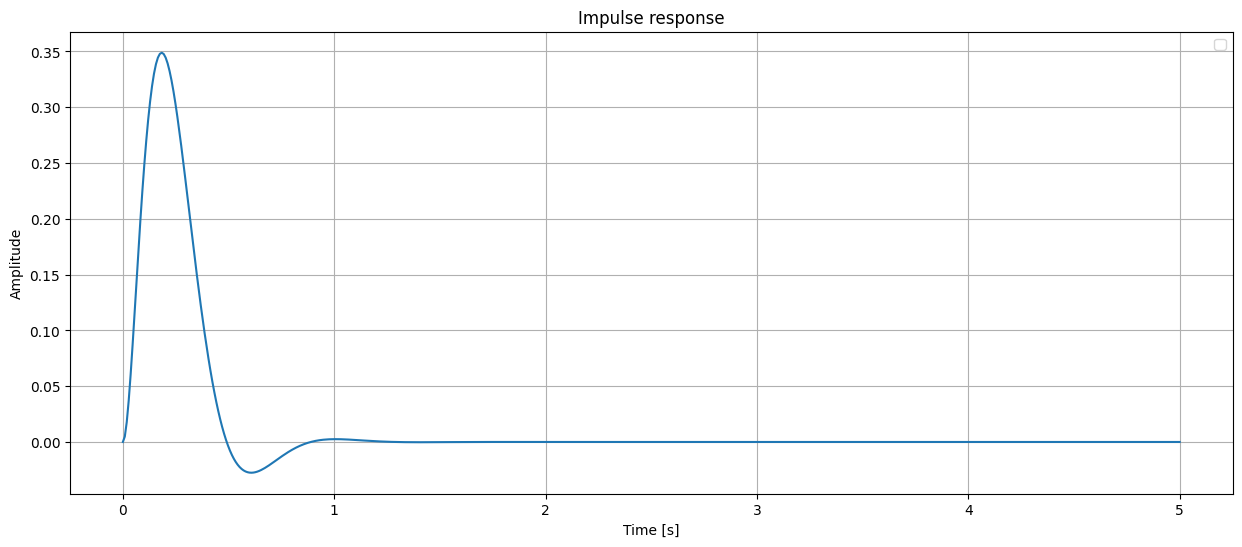

In [45]:
t1, y1 = ct.impulse_response(g_tf, 5)
plt.figure(figsize=(15, 6))
plt.plot(t1, y1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response')
plt.legend()
plt.grid()
plt.show()

1. f.

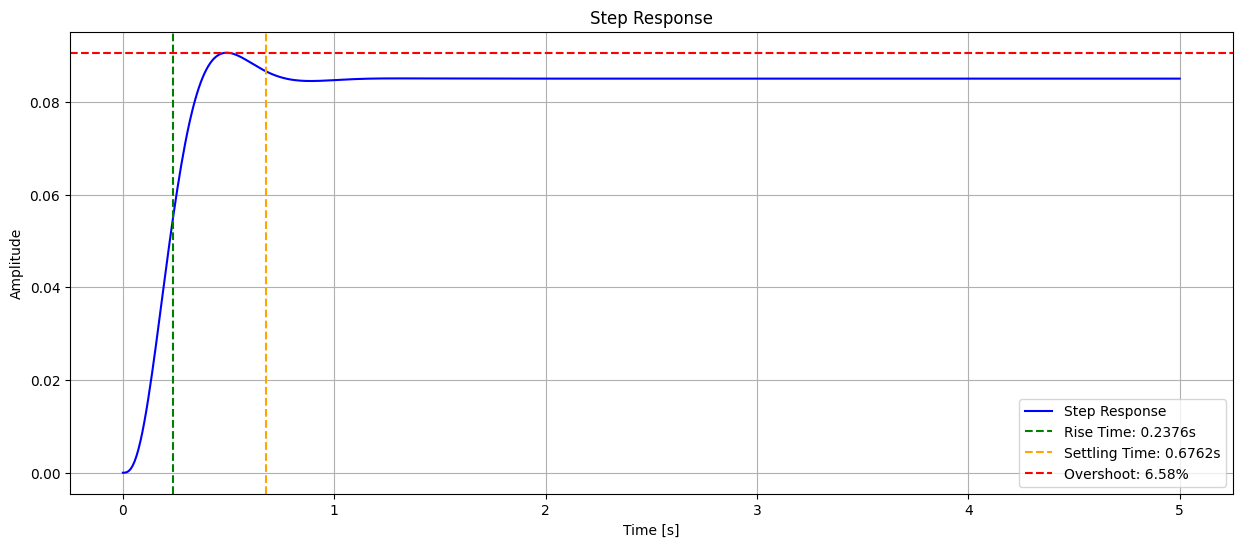


=== Step Response Information ===
RiseTime : 0.2376
SettlingTime : 0.6762
SettlingMin : 0.0782
SettlingMax : 0.0906
Overshoot : 6.5757
Undershoot : 0.0000
Peak : 0.0906
PeakTime : 0.4934
SteadyStateValue : 0.0850


In [46]:
# Simulasi Step Response
t1, y1 = ct.step_response(g_tf, 5)

# Step Response Information
data = ct.step_info(g_tf)

# Ambil parameter penting
rise_time = data["RiseTime"]
settling_time = data["SettlingTime"]
overshoot = data["Overshoot"]
peak_time = data["PeakTime"]
peak_value = data["Peak"]

# Plot Step Response
plt.figure(figsize=(15, 6))
plt.plot(t1, y1, label="Step Response", color='b')

# Tambahkan garis Rise Time
plt.axvline(rise_time, color='g', linestyle='--', label=f"Rise Time: {rise_time:.4f}s")

# Tambahkan garis Settling Time
plt.axvline(settling_time, color='orange', linestyle='--', label=f"Settling Time: {settling_time:.4f}s")

# Tambahkan garis Overshoot
plt.axhline(peak_value, color='r', linestyle='--', label=f"Overshoot: {overshoot:.2f}%")

# Label dan tampilan
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()
plt.show()

# Menampilkan informasi step response di terminal
print("\n=== Step Response Information ===")
for k, v in data.items():
    print(f'{k} : {float(v):.4f}')

1. g.

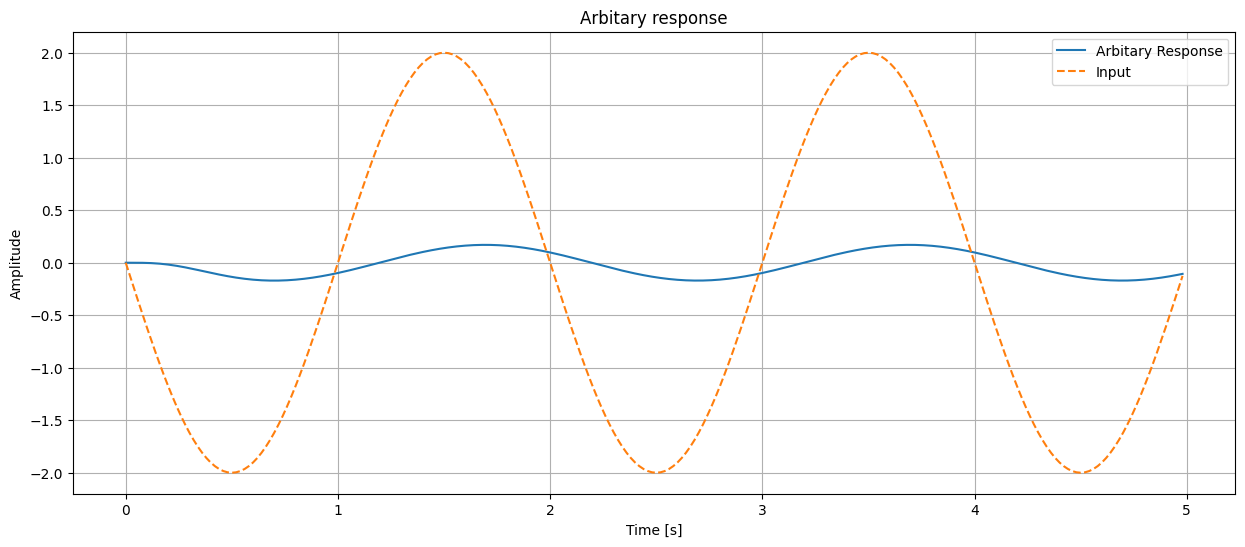

Response characteristics: 
Peak: 0.1701
Steady_state values: -0.1061


In [47]:
t = np.arange (0, 5, 0.02)
u = 2 * np.cos(np.pi * t + (np.pi/2))

time, y_out = ct.forced_response(g_tf, T=t, U=u)

plt.figure(figsize=(15, 6))
plt.plot(time, y_out, label='Arbitary Response')
plt.plot(time, u, label='Input', linestyle='--')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Arbitary response')
plt.legend()
plt.grid()
plt.show()

print ("Response characteristics: ")
print (f"Peak: {np.max(y_out):.4f}")
print (f"Steady_state values: {y_out[-1]:.4f}")

1. h.

In [48]:
num = [1]
den = [2, 0.25, 1.5]

x_ss = ct.tf2ss(num, den)
print ("x ss = ", x_ss)
A, B, C, D = x_ss.A, x_ss.B, x_ss.C, x_ss.D

x ss =  <StateSpace>: sys[92]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-0.125 -0.75 ]
     [ 1.     0.   ]]

B = [[1.]
     [0.]]

C = [[0.  0.5]]

D = [[0.]]



1. i.

In [49]:
x_tf = ct.TransferFunction(num, den)
print ("x_tf = ", x_tf)

x_tf =  <TransferFunction>: sys[94]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1
--------------------
2 s^2 + 0.25 s + 1.5



1. j.

/var/folders/zn/rdh1j_21601dfnxl9tt64v7h0000gn/T/ipykernel_69176/881926045.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


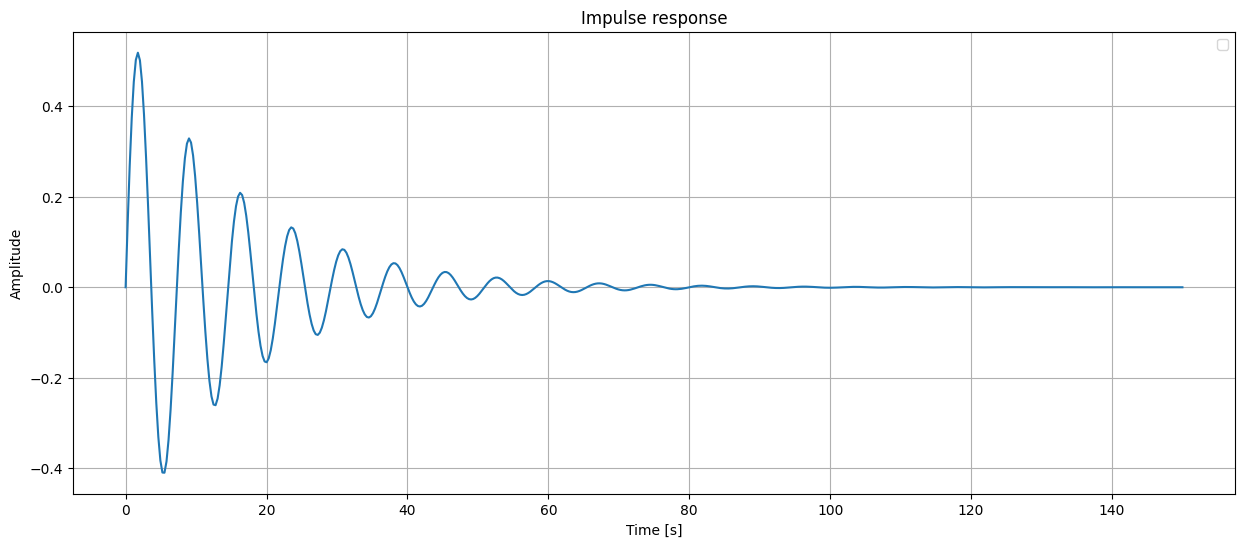

In [50]:
t1, y1 = ct.impulse_response(x_tf, 150)
plt.figure(figsize=(15, 6))
plt.plot(t1, y1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response')
plt.legend()
plt.grid()
plt.show()

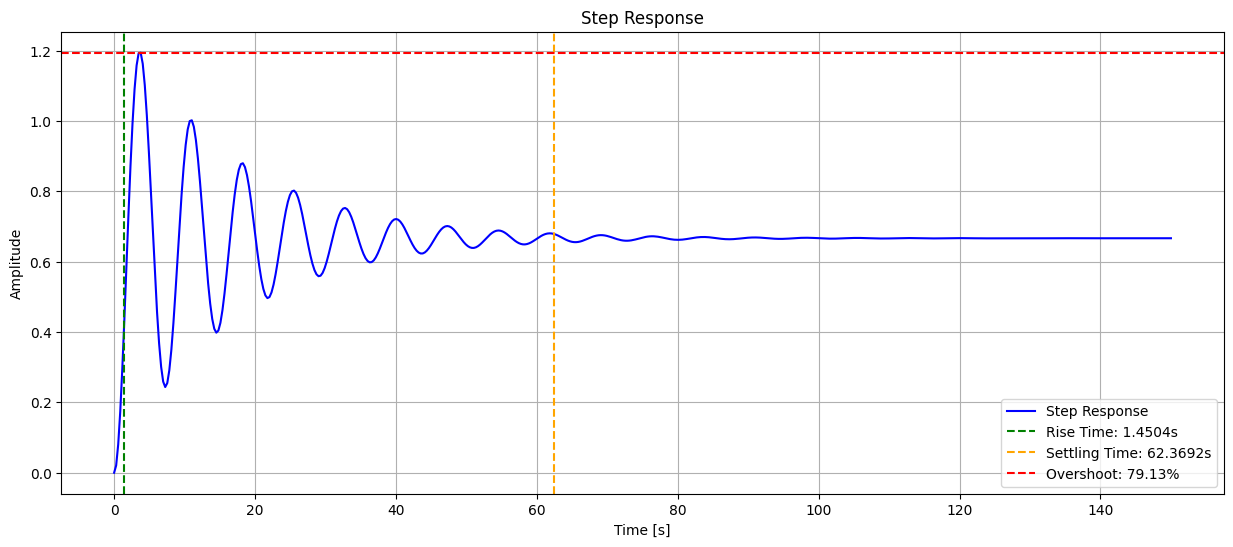


=== Step Response Information ===
RiseTime : 1.4504
SettlingTime : 62.3692
SettlingMin : 0.2436
SettlingMax : 1.1942
Overshoot : 79.1333
Undershoot : 0.0000
Peak : 1.1942
PeakTime : 3.7712
SteadyStateValue : 0.6667


In [51]:
t1, y1 = ct.step_response(x_tf, 150)
# Step Response Information
data = ct.step_info(x_tf)

# Ambil parameter penting
rise_time = data["RiseTime"]
settling_time = data["SettlingTime"]
overshoot = data["Overshoot"]
peak_time = data["PeakTime"]
peak_value = data["Peak"]

# Plot Step Response
plt.figure(figsize=(15, 6))
plt.plot(t1, y1, label="Step Response", color='b')

# Tambahkan garis Rise Time
plt.axvline(rise_time, color='g', linestyle='--', label=f"Rise Time: {rise_time:.4f}s")

# Tambahkan garis Settling Time
plt.axvline(settling_time, color='orange', linestyle='--', label=f"Settling Time: {settling_time:.4f}s")

# Tambahkan garis Overshoot
plt.axhline(peak_value, color='r', linestyle='--', label=f"Overshoot: {overshoot:.2f}%")

# Label dan tampilan
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()
plt.show()

# Menampilkan informasi step response di terminal
print("\n=== Step Response Information ===")
for k, v in data.items():
    print(f'{k} : {float(v):.4f}')